In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import sklearn.model_selection as model_selection
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report)
from sklearn.svm import SVC

In [46]:
data = pd.read_excel("datakuisoner.xlsx")
df = pd.DataFrame(data.loc[:,['Outcome','JumlahKepanitiaan','JumlahJamTidur','LamaPerjalanan','Olahraga','Curhat']])
df["Outcome"].replace({"Iya": 1, "Tidak": 0}, inplace=True)
print(df)

     Outcome  JumlahKepanitiaan  JumlahJamTidur  LamaPerjalanan  Olahraga  \
0          1                  7               3              25         0   
1          1                  9               3              40        10   
2          0                  7               4              30        10   
3          1                  7               5              40         5   
4          1                  4               3              30        13   
..       ...                ...             ...             ...       ...   
124        0                  2               8              15       100   
125        0                  1               9              10        70   
126        0                  0               9              45        90   
127        0                  2              10              45         0   
128        0                  3               7              10       100   

     Curhat  
0         6  
1         6  
2         3  
3         6  
4    

In [47]:
df = df.rename(columns={"Apakah merasa tertekan di semester ini?": "Output","Kepanitian & Organisasi": "JumlahKepanitiaan", "Rata-rata jam tidur": "JamTidur", "Lama Perjelanan ke kampus (Menit)": "PerjalananKampus","Olahraga (Menit)": "Olahraga"})
print(df)

     Outcome  JumlahKepanitiaan  JumlahJamTidur  LamaPerjalanan  Olahraga  \
0          1                  7               3              25         0   
1          1                  9               3              40        10   
2          0                  7               4              30        10   
3          1                  7               5              40         5   
4          1                  4               3              30        13   
..       ...                ...             ...             ...       ...   
124        0                  2               8              15       100   
125        0                  1               9              10        70   
126        0                  0               9              45        90   
127        0                  2              10              45         0   
128        0                  3               7              10       100   

     Curhat  
0         6  
1         6  
2         3  
3         6  
4    

In [48]:
x = df.iloc[:, 1:6]
y = df.iloc[:, 0]
minmax = MinMaxScaler()
minmax.fit(x)
x = minmax.fit_transform(x)
print(x)
print("Data x \n", x)
print("Data y \n", y)

[[0.58333333 0.         0.23529412 0.         0.66666667]
 [0.75       0.         0.41176471 0.08333333 0.66666667]
 [0.58333333 0.14285714 0.29411765 0.08333333 0.33333333]
 [0.58333333 0.28571429 0.41176471 0.04166667 0.66666667]
 [0.33333333 0.         0.29411765 0.10833333 0.55555556]
 [0.16666667 0.71428571 0.05882353 0.25       0.11111111]
 [0.41666667 0.14285714 0.47058824 0.08333333 0.55555556]
 [0.16666667 0.71428571 0.02352941 0.45833333 0.        ]
 [0.08333333 0.85714286 0.11764706 0.75       0.        ]
 [0.58333333 0.         0.64705882 0.         0.44444444]
 [0.41666667 0.14285714 0.29411765 0.         0.66666667]
 [0.08333333 0.57142857 0.05882353 0.75       0.        ]
 [0.5        0.14285714 0.29411765 0.08333333 0.55555556]
 [0.5        0.14285714 1.         0.08333333 0.44444444]
 [0.75       0.         0.76470588 0.         0.55555556]
 [0.83333333 0.14285714 0.82352941 0.08333333 0.66666667]
 [0.83333333 0.14285714 0.29411765 0.08333333 0.77777778]
 [0.16666667 0

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [50]:
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform', random_state=42)
x_train = kbins.fit_transform(x_train)
x_test = kbins.fit_transform(x_test)

c:\Users\reyha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\reyha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [51]:
print("Data training variable :", x_train)
print("Data training class :", *y_train)
print("Data testing variable :", x_test)
print("Data testing class :", *y_test)

Data training variable : [[2. 0. 1. 0. 1.]
 [0. 3. 0. 0. 0.]
 [1. 1. 2. 0. 1.]
 [0. 3. 0. 1. 0.]
 [0. 3. 0. 0. 0.]
 [2. 1. 3. 0. 2.]
 [2. 0. 1. 0. 2.]
 [2. 0. 2. 0. 1.]
 [1. 2. 1. 0. 3.]
 [0. 3. 2. 1. 0.]
 [1. 0. 0. 1. 2.]
 [1. 2. 0. 2. 0.]
 [0. 2. 0. 1. 1.]
 [0. 3. 0. 1. 0.]
 [0. 3. 1. 3. 0.]
 [1. 2. 0. 2. 0.]
 [0. 3. 0. 1. 0.]
 [1. 0. 3. 0. 3.]
 [0. 2. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [1. 1. 1. 0. 1.]
 [3. 0. 1. 0. 3.]
 [0. 2. 0. 3. 0.]
 [1. 2. 0. 0. 0.]
 [3. 0. 1. 0. 2.]
 [0. 3. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 2. 0. 1. 0.]
 [3. 0. 0. 0. 3.]
 [1. 3. 1. 3. 0.]
 [0. 3. 0. 3. 0.]
 [2. 0. 3. 0. 1.]
 [1. 0. 0. 0. 2.]
 [2. 1. 1. 0. 2.]
 [0. 3. 0. 3. 0.]
 [0. 3. 0. 1. 0.]
 [1. 0. 0. 0. 2.]
 [2. 0. 0. 0. 3.]
 [1. 0. 1. 0. 2.]
 [0. 3. 0. 2. 0.]
 [3. 2. 2. 0. 1.]
 [1. 0. 2. 0. 2.]
 [0. 3. 0. 1. 1.]
 [0. 2. 0. 1. 0.]
 [1. 2. 0. 0. 2.]
 [1. 0. 3. 0. 3.]
 [2. 0. 0. 0. 3.]
 [1. 0. 3. 0. 2.]
 [0. 3. 0. 2. 0.]
 [3. 0. 2. 0. 3.]
 [1. 2. 0. 1. 0.]
 [0. 3. 0. 1. 0.]
 [1. 2. 0. 0. 0.]
 [0

### Naive Bayes Prediction

In [52]:
print("Naive Bayes")
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_predictionNB = gaussian.predict(x_test)
accuracy_nb = round(accuracy_score(y_test, y_predictionNB)* 100, 2)
acc_gaussianNB = round(gaussian.score(x_train, y_train)* 100, 2)
print("Prediksi Naive Bayes : ", y_predictionNB)

Naive Bayes
Prediksi Naive Bayes :  [1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0]


In [53]:
CMNB = confusion_matrix(y_test, y_predictionNB)
accuracyNB = accuracy_score(y_test, y_predictionNB)
precisionNB = precision_score(y_test, y_predictionNB)
recallNB = recall_score(y_test, y_predictionNB)
f1NB = f1_score(y_test, y_predictionNB)

In [54]:
TNNB = CMNB[1][1] * 1.0
FNNB = CMNB[1][0] * 1.0
TPNB = CMNB[0][0] * 1.0
FPNB = CMNB[0][1] * 1.0
total = TNNB + TPNB + FPNB + FNNB
sensitivityNB = TNNB / (TNNB + FPNB)* 100
specificityNB = TPNB / (TPNB + FNNB)* 100

In [55]:
print("Akurasi Naive Bayes: ", accuracyNB * 100, "%")
print("Recall Naive Bayes: ", recallNB*100, "%")
print("Precision Naive Bayes: ", + precisionNB)
# print("f1Score : ", f1NB)

Akurasi Naive Bayes:  89.74358974358975 %
Recall Naive Bayes:  91.66666666666666 %
Precision Naive Bayes:  0.7857142857142857


Confusion matrix for Naive Bayes
 [[24  3]
 [ 1 11]]


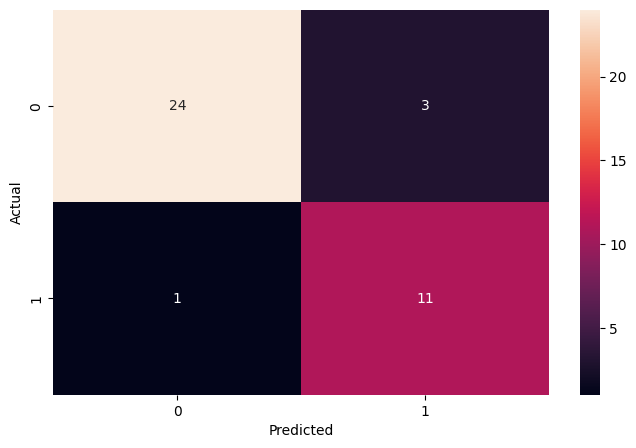

In [56]:
cm_displayNB=ConfusionMatrixDisplay(confusion_matrix=CMNB)
print('Confusion matrix for Naive Bayes\n',CMNB)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionNB), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree Prediction

In [57]:
print("Decision Tree")
Decision = DecisionTreeClassifier(random_state=42)
Decision.fit(x_train, y_train)
y_predictionDT = Decision.predict(x_test)
accuracy_DT = round(accuracy_score(y_test, y_predictionDT)* 100, 2)
acc_DecisionDT = round(Decision.score(x_train, y_train)* 100, 2)
print("Prediksi Decision Tree : ", y_predictionDT)

Decision Tree
Prediksi Decision Tree :  [1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0]


In [58]:
CMDT = confusion_matrix(y_test, y_predictionDT)
accuracyDT = accuracy_score(y_test, y_predictionDT)
precisionDT = precision_score(y_test, y_predictionDT)
recallDT = recall_score(y_test, y_predictionDT)
f1DT = f1_score(y_test, y_predictionDT)

In [59]:
TNDT = CMDT[1][1] * 1.0
FNDT = CMDT[1][0] * 1.0
TPDT = CMDT[0][0] * 1.0
FPDT = CMDT[0][1] * 1.0
total = TNDT + TPDT + FPDT + FNDT
sensitivityDT = TNDT / (TNDT + FPDT)* 100
specificityDT = TPDT / (TPDT + FNDT)* 100

In [60]:
print("Akurasi Decision Tree: ", accuracyDT * 100, "%")
print("Recall Decision Tree: ", recallDT*100, "%")
print("Precision Decision Tree: ", + precisionDT)

Akurasi Decision Tree:  92.3076923076923 %
Recall Decision Tree:  100.0 %
Precision Decision Tree:  0.8


Confusion matrix for Decision Tree
 [[24  3]
 [ 0 12]]


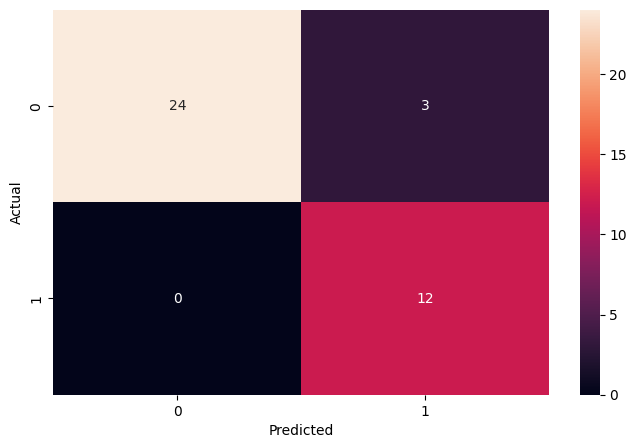

In [61]:
cm_displayDT=ConfusionMatrixDisplay(confusion_matrix=CMDT)
print('Confusion matrix for Decision Tree\n',CMDT)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionDT), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Random Forest Prediction

In [62]:
print("Random Forest")
Forest = RandomForestClassifier(random_state=42)
Forest.fit(x_train, y_train)
y_predictionRF = Forest.predict(x_test)
accuracy_RF = round(accuracy_score(y_test, y_predictionRF)* 100, 2)
acc_DecisionRF = round(Forest.score(x_train, y_train)* 100, 2)
print("Prediksi Random Forest : ", y_predictionRF)

Random Forest
Prediksi Random Forest :  [1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0]


In [63]:
CMRF = confusion_matrix(y_test, y_predictionRF)
accuracyRF = accuracy_score(y_test, y_predictionRF)
precisionRF = precision_score(y_test, y_predictionRF)
recallRF = recall_score(y_test, y_predictionRF)
f1RF = f1_score(y_test, y_predictionRF)

In [64]:
TNRF = CMRF[1][1] * 1.0
FNRF = CMRF[1][0] * 1.0
TPRF = CMRF[0][0] * 1.0
FPRF = CMRF[0][1] * 1.0
total = TNRF + TPRF + FPRF + FNRF
sensitivityRF = TNRF / (TNRF + FPRF)* 100
specificityRF = TPRF / (TPRF + FNRF)* 100

In [65]:
print("Akurasi Random Forest: ", accuracyRF * 100, "%")
print("Recall Random Forest: ", recallRF*100, "%")
print("Precision Random Forest: ", + precisionRF)

Akurasi Random Forest:  92.3076923076923 %
Recall Random Forest:  100.0 %
Precision Random Forest:  0.8


### SVC Prediction

In [66]:
from sklearn import svm


SVM = svm.SVC(random_state=0)
SVM.fit(x_train, y_train)
y_predictionSVM = SVM.predict(x_test)
accuracy_SVM = round(accuracy_score(y_test, y_predictionSVM)* 100, 2)
acc_DecisionSVM = round(SVM.score(x_train, y_train)* 100, 2)
print("Prediksi SVM : ", y_predictionSVM)

Prediksi SVM :  [1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0]


In [67]:
CMSVM = confusion_matrix(y_test, y_predictionSVM)
accuracySVM = accuracy_score(y_test, y_predictionSVM)
precisionSVM = precision_score(y_test, y_predictionSVM)
recallSVM = recall_score(y_test, y_predictionSVM)
f1SVM = f1_score(y_test, y_predictionSVM)

In [68]:
TNSVM = CMDT[1][1] * 1.0
FNSVM = CMDT[1][0] * 1.0
TPSVM = CMDT[0][0] * 1.0
FPSVM = CMDT[0][1] * 1.0
total = TNSVM + TPSVM + FPSVM + FNSVM
sensitivityDT = TNSVM / (TNSVM + FPSVM)* 100
specificityDT = TPSVM / (TPSVM + FNSVM)* 100

In [69]:
print("Akurasi SVM: ", accuracySVM * 100, "%")
print("Recall SVM: ", recallSVM*100, "%")
print("Precision SVM: ", + precisionSVM)

Akurasi SVM:  94.87179487179486 %
Recall SVM:  100.0 %
Precision SVM:  0.8571428571428571


Confusion matrix for SVM
 [[25  2]
 [ 0 12]]


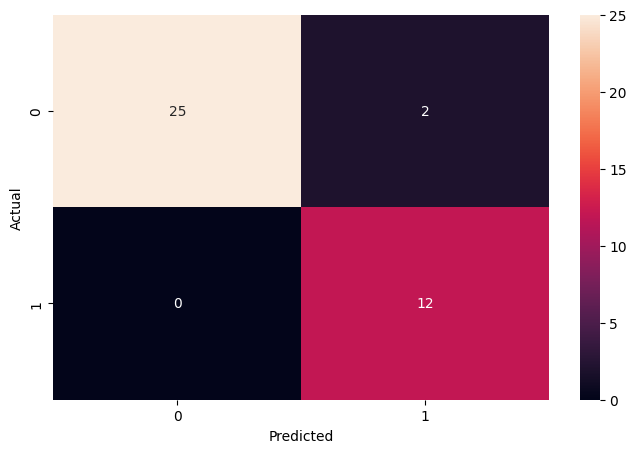

In [70]:
cm_displaySVM=ConfusionMatrixDisplay(confusion_matrix=CMSVM)
print('Confusion matrix for SVM\n',CMSVM)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionSVM), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### The Final Result of Accuration

In [71]:
print("Perbandingan Akurasi Setiap Model Prediction: \n Naive Bayes : ", accuracyNB* 100, "%", "\n Decision Tree : ", accuracyDT* 100, "%", "\n Random Forest : ", accuracyRF* 100, "%", "\n SVC : ", accuracySVM* 100, "%" )

Perbandingan Akurasi Setiap Model Prediction: 
 Naive Bayes :  89.74358974358975 % 
 Decision Tree :  92.3076923076923 % 
 Random Forest :  92.3076923076923 % 
 SVC :  94.87179487179486 %


In [74]:
# Assuming your model was trained with feature names 'JumlahJamTidur' and 'LamaPerjalanan'
input_data = {'JumlahKepanitiaan': 12, 'JumlahJamTidur': 3, 'LamaPerjalanan': 50, 'Olahraga': 3, 'Curhat': 1}
input_data_df = pd.DataFrame([input_data])
input_data_df2 = minmax.transform(input_data_df)
input_data_df1 = kbins.transform(input_data_df2)
print(input_data_df1)
predictDF = SVM.predict(input_data_df1)
print(predictDF)


[[3. 0. 2. 0. 0.]]
[1]
